Hipótesis nula (H₀):
Las variables Duration y Maxpulse no tienen un efecto significativo en la cantidad de calorías quemadas.

Hipótesis alternativa (H₁):
Al menos una de las variables Duration o Maxpulse tiene un efecto significativo sobre la cantidad de calorías quemadas.

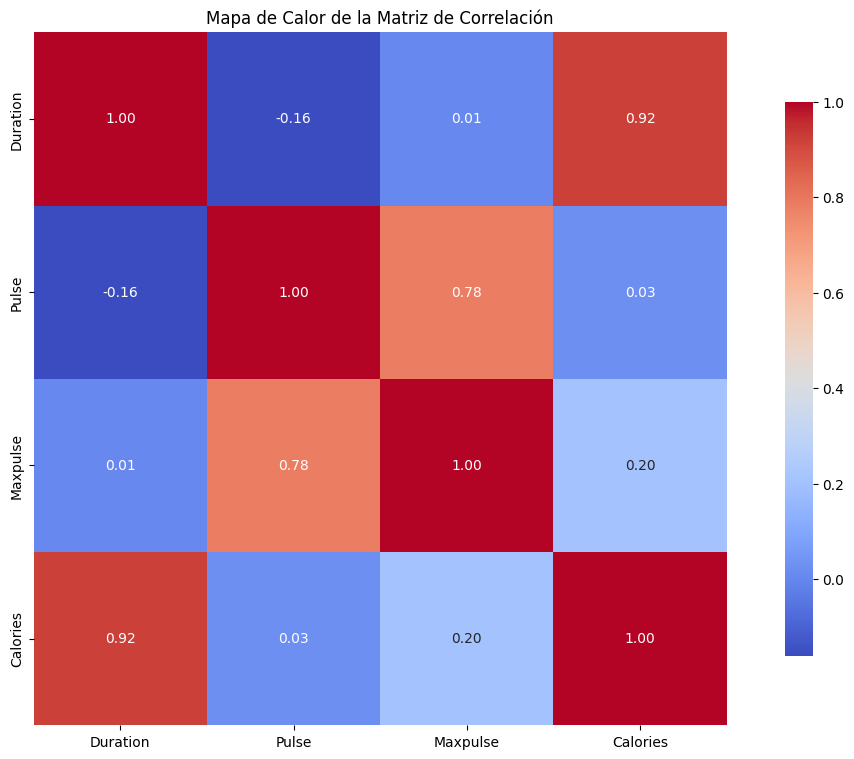

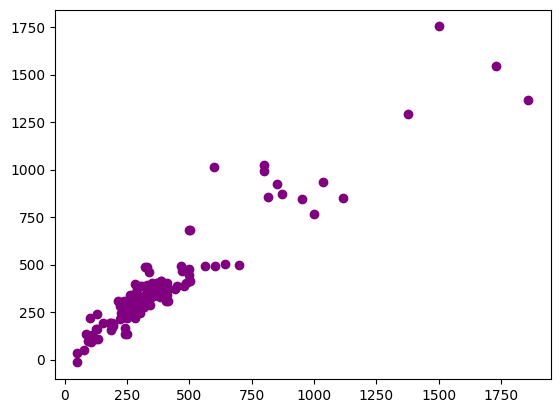

Coeficiente de determinación:  0.8908

valor-p de Shapiro:  0.00000000004660

valor_p de Breusch-Pagan:  0.00000000000008



In [1]:
#Priscila Eowin Bollas Guevara

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Eowin2210/Estadistica-inferencial/refs/heads/main/data%20(3).csv")
df.dropna(inplace = True) 
df

correlation_matrix = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')

X = df[["Duration", "Maxpulse"]]
Y = df["Calories"]

import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()

Yc = modelo.predict(x_constante)

plt.figure()
plt.scatter(Y, Yc, color = 'purple')
plt.show()

from sklearn.metrics import r2_score  
r2 = r2_score(Y, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

residuales = modelo.resid

from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.14f}\n')


from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.14f}\n')

Interpretacion de resultados

1. Coeficiente de determinación (R² = 0.82)
El modelo explica el 82% de la variación en las calorías quemadas a partir de las variables Duration (duración del ejercicio) y Maxpulse (pulso máximo).
Esto nos dice que el modelo tiene un excelente poder explicativo.

2. Prueba de normalidad de Shapiro-Wilk (p = 0.15)
El valor-p es mayor que 0.05, por lo tanto, no se rechaza la hipótesis nula.
Los errores del modelo se distribuyen normalmente, lo cual es deseable y sugiere que el modelo es válido desde el punto de vista de la normalidad.

3. Prueba de heterocedasticidad de Breusch-Pagan (p = 0.23)
El valor-p es mayor que 0.05, por lo tanto, no se rechaza la hipótesis nula.
No hay evidencia de heterocedasticidad, lo que significa que la varianza de los errores es constante. Esto es una buena señal y valida el modelo en cuanto a la homocedasticidad.

Conclusión

Con base en los resultados obtenidos, se concluye que el modelo de regresión lineal que utiliza las variables Duration (duración del ejercicio) y Maxpulse (pulso máximo) es adecuado para predecir la cantidad de calorías quemadas. El modelo presenta un buen ajuste, cumple con los supuestos de normalidad de los errores y homocedasticidad, lo que valida su uso. Por lo tanto, se puede afirmar que la duración del ejercicio y el pulso máximo tienen un efecto significativo en la cantidad de calorías quemadas.